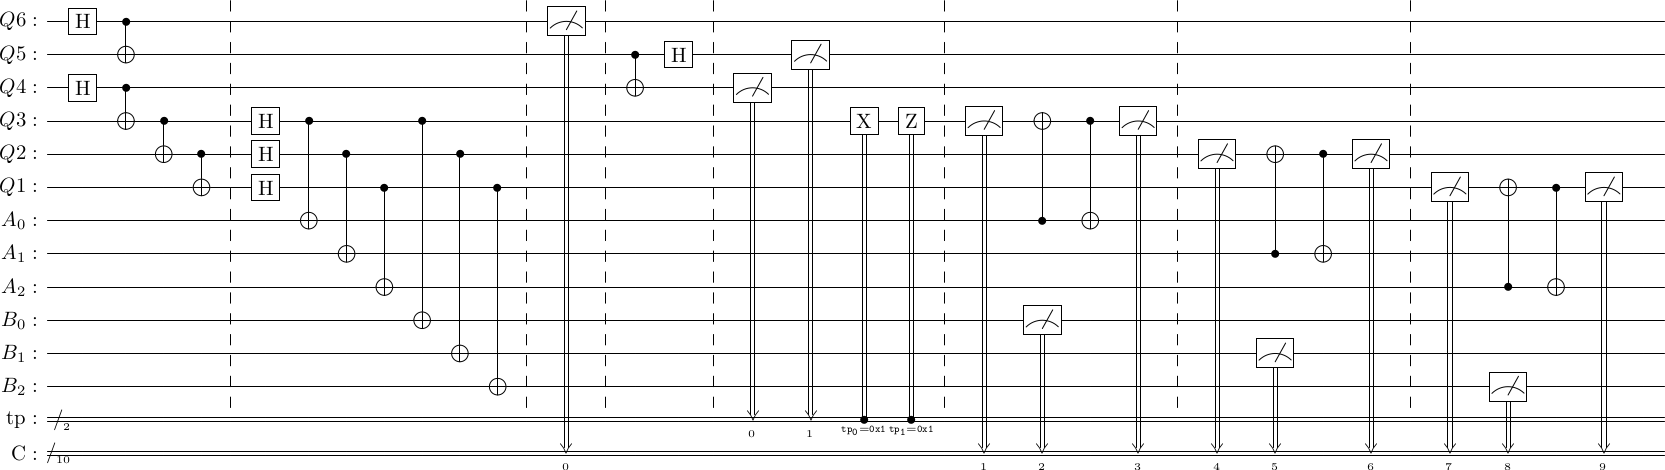

In [31]:
import qiskit as qs
from qiskit import IBMQ, Aer, execute
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, AncillaRegister
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_histogram

sv_sim = Aer.get_backend("statevector_simulator")
qs_sim = Aer.get_backend("qasm_simulator")

#initial state
q6 = QuantumRegister(1, name="Q6")
q5 = QuantumRegister(1, name="Q5")
#GHZ4
q4 = QuantumRegister(1, name="Q4")
q3 = QuantumRegister(1, name="Q3")
q2 = QuantumRegister(1, name="Q2")
q1 = QuantumRegister(1, name="Q1")
#ancilla
a1 = QuantumRegister(3, name="A")
b1 = QuantumRegister(3, name="B")
#teleportation classical channel
tp = ClassicalRegister(2, name="tp")
#readout
readout = ClassicalRegister(10, name="C")
#whole circuit
qc = QuantumCircuit(q6,
                    q5,
                    q4, q3, q2, q1,
                    a1, b1, tp, readout)
#original bell pair
qc.h(q6)
qc.cx(q6,q5)

#GHZ states
qc.h(q4)
qc.cx(q4,q3)
qc.cx(q3,q2)
qc.cx(q2,q1)

qc.barrier()

#shor's encoding
qc.h(q3)
qc.h(q2)
qc.h(q1)
qc.cx(q3,a1[0])
qc.cx(q3,b1[0])
qc.cx(q2,a1[1])
qc.cx(q2,b1[1])
qc.cx(q1,a1[2])
qc.cx(q1,b1[2])

qc.barrier()

qc.measure(q6, readout[0])
qc.barrier()

#teleportation w/o beginnning entanglement

qc.cx(q5,q4)
qc.h(q5)

qc.barrier()
qc.measure(q4,tp[0])
qc.measure(q5,tp[1])

qc.x(q3).c_if(tp[0], 1) 
qc.z(q3).c_if(tp[1], 1)

qc.barrier()

#readout
qc.measure(q3,readout[1])
qc.cx(a1[0],q3)
qc.cx(q3,a1[0])
qc.measure(q3,readout[3])
qc.measure(b1[0],readout[2])

qc.barrier()

qc.measure(q2,readout[4])
qc.cx(a1[1],q2)
qc.cx(q2,a1[1])
qc.measure(q2,readout[6])
qc.measure(b1[1],readout[5])

qc.barrier()

qc.measure(q1,readout[7])
qc.cx(a1[2],q1)
qc.cx(q1,a1[2])
qc.measure(q1,readout[9])
qc.measure(b1[2],readout[8])


qc.draw("latex", scale=1.0)


In [37]:
svjob = execute(qc, sv_sim)
svresult = svjob.result()
statevec = svresult.get_statevector()
statevec.draw("latex")


<IPython.core.display.Latex object>

In [15]:
qsjob = execute(qc, qs_sim, shots=1000)
qsresult = qsjob.result()
qsresult.get_counts()

{'0000111100 11': 16,
 '0110111101 11': 14,
 '0110110001 00': 11,
 '0110111011 01': 17,
 '0000110000 10': 15,
 '0110001010 01': 15,
 '0110000110 00': 11,
 '0000110111 00': 16,
 '0110000110 10': 23,
 '0110000000 10': 20,
 '0110110000 00': 16,
 '0110111100 11': 20,
 '0000111101 11': 19,
 '0110001010 11': 7,
 '0110000001 10': 9,
 '0110000111 10': 9,
 '0000111100 01': 15,
 '0110110001 10': 24,
 '0110111101 01': 11,
 '0000001010 11': 29,
 '0000001101 01': 16,
 '0000000000 10': 23,
 '0110001011 11': 21,
 '0000110110 10': 14,
 '0110110111 10': 15,
 '0110110000 10': 9,
 '0110111100 01': 16,
 '0000111101 01': 17,
 '0000000111 10': 9,
 '0110001101 11': 10,
 '0000000110 10': 20,
 '0110001100 11': 18,
 '0000001011 01': 12,
 '0000001100 11': 17,
 '0000000001 00': 16,
 '0000000110 00': 19,
 '0000000000 00': 15,
 '0000001101 11': 20,
 '0000111010 11': 16,
 '0110111011 11': 17,
 '0000110000 00': 15,
 '0000001010 01': 17,
 '0110110110 00': 16,
 '0110000001 00': 19,
 '0110111010 11': 11,
 '0000110001 00